Dataset: https://www.kaggle.com/datasets/sharmageetika/phishing-url-dataset?resource=download

In [1]:
#importing necessary libraries
import pandas as pd
import requests

In [2]:
#opening orginal phising dataset from the link given above
phising_dataset_orginal = pd.read_csv("Phishing_URL_Dataset.csv")
phising_dataset_orginal.head(10)

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
5,23107.txt,https://www.globalreporting.org,30,www.globalreporting.org,23,0,org,100.0,1.000000,0.079963,...,0,0,1,35,1,11,86,0,14,1
6,23034.txt,https://www.saffronart.com,25,www.saffronart.com,18,0,com,100.0,1.000000,0.522907,...,0,0,1,32,4,14,44,2,17,1
7,696732.txt,https://www.nerdscandy.com,25,www.nerdscandy.com,18,0,com,100.0,1.000000,0.522907,...,0,0,1,24,2,22,36,0,15,1
8,739255.txt,https://www.hyderabadonline.in,29,www.hyderabadonline.in,22,0,in,100.0,1.000000,0.005084,...,0,0,1,71,4,9,40,1,317,1
9,14486.txt,https://www.aap.org,18,www.aap.org,11,0,org,100.0,1.000000,0.079963,...,0,0,1,10,1,12,173,6,65,1


In [3]:
phising_dataset_orginal["label"].value_counts()

label
1    134850
0    100945
Name: count, dtype: int64

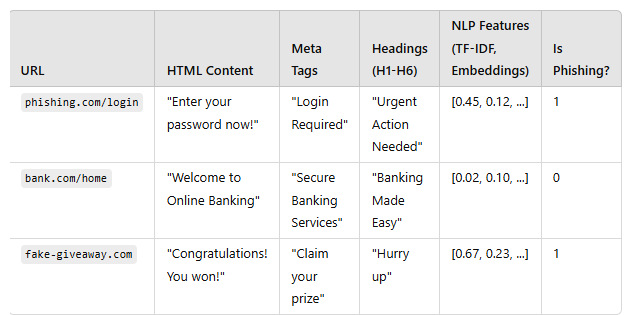

HTTP Status Codes:

200 OK – The request was successful.

301 Moved Permanently – The URL has been redirected to a new location.

403 Forbidden – The server is blocking access.

404 Not Found – The requested page does not exist.


Firstly, there is a need to choose the webistes, which are working properly (http status code is equal to 200)

In [30]:
import asyncio
import pandas as pd
import aiohttp
import nest_asyncio
import random
import time
import numpy as np

nest_asyncio.apply()

only_bad = phising_dataset_orginal[phising_dataset_orginal["label"]==0]

urls_all = only_bad['URL'].sample(n=1500, random_state=42).reset_index(drop=True)
urls_all = [url for url in urls_all if url.startswith("http")]
batches = np.array_split(urls_all, 10)

results_all = []

async def fetch_status_with_retries(session, url, retries=3):
    headers = {
        "User-Agent": "Mozilla/5.0"
    }
    for attempt in range(retries):
        try:
            await asyncio.sleep(random.uniform(0.5, 1.5))
            async with session.get(url, headers=headers, timeout=20) as response:
                return url, response.status
        except Exception as e:
            if attempt == retries - 1:
                return url, f"Error: {str(e)}"
            await asyncio.sleep(2)

async def process_batch(urls):
    connector = aiohttp.TCPConnector(limit_per_host=5)
    async with aiohttp.ClientSession(connector=connector) as session:
        tasks = [fetch_status_with_retries(session, url) for url in urls]
        return await asyncio.gather(*tasks)

for i, batch in enumerate(batches):
    print(f"🚀 Processing batch {i+1} of {len(batches)}...")
    results = await process_batch(list(batch))
    results_all.extend(results)

    print("✅ Batch complete. Waiting 30s before next...")
    time.sleep(30)

# Save results
results_df = pd.DataFrame(results_all, columns=["url", "status_code"])
results_df.to_csv("10k_urls_status_only_bad10.csv", index=False)
print("📊 Final status counts:")
print(results_df['status_code'].value_counts())


🚀 Processing batch 1 of 10...
✅ Batch complete. Waiting 30s before next...
🚀 Processing batch 2 of 10...
✅ Batch complete. Waiting 30s before next...
🚀 Processing batch 3 of 10...
✅ Batch complete. Waiting 30s before next...
🚀 Processing batch 4 of 10...
✅ Batch complete. Waiting 30s before next...
🚀 Processing batch 5 of 10...
✅ Batch complete. Waiting 30s before next...
🚀 Processing batch 6 of 10...
✅ Batch complete. Waiting 30s before next...
🚀 Processing batch 7 of 10...
✅ Batch complete. Waiting 30s before next...
🚀 Processing batch 8 of 10...
✅ Batch complete. Waiting 30s before next...
🚀 Processing batch 9 of 10...
✅ Batch complete. Waiting 30s before next...
🚀 Processing batch 10 of 10...


Exception in callback _ProactorBasePipeTransport._call_connection_lost(None)
handle: <Handle _ProactorBasePipeTransport._call_connection_lost(None)>
Traceback (most recent call last):
  File "c:\Users\Ssawka\anaconda3\Lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Ssawka\anaconda3\Lib\asyncio\proactor_events.py", line 165, in _call_connection_lost
    self._sock.shutdown(socket.SHUT_RDWR)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host


✅ Batch complete. Waiting 30s before next...
📊 Final status counts:
status_code
404                                                                                                                                                     326
200                                                                                                                                                     212
Error: [WinError 64] The specified network name is no longer available                                                                                  116
403                                                                                                                                                      85
Error:                                                                                                                                                   32
                                                                                                                                            

In [36]:
#Only phishing webistes 
url_status_only_bad8 = pd.read_csv("10k_urls_status_only_bad8.csv")
#url_status_only_bad3.head(5)
url_status_only_bad8["status_code"].value_counts()

status_code
404                                                                                                                                                     326
200                                                                                                                                                     210
Error: [WinError 64] The specified network name is no longer available                                                                                  116
403                                                                                                                                                      84
Error:                                                                                                                                                   32
                                                                                                                                                       ... 
Error: Cannot connect to host www.omwowxish.ga:80 ss

In [37]:
#Only phishing webistes 
url_status_only_bad9 = pd.read_csv("10k_urls_status_only_bad9.csv")
#url_status_only_bad3.head(5)
url_status_only_bad9["status_code"].value_counts()

status_code
404                                                                                                                                                     326
200                                                                                                                                                     210
Error: [WinError 64] The specified network name is no longer available                                                                                  116
403                                                                                                                                                      85
Error:                                                                                                                                                   32
                                                                                                                                                       ... 
Error: Cannot connect to host mrh-project.eu:443 ssl

In [38]:
#Only phishing webistes 
url_status_only_bad10 = pd.read_csv("10k_urls_status_only_bad8.csv")
#url_status_only_bad3.head(5)
url_status_only_bad10["status_code"].value_counts()

status_code
404                                                                                                                                                     326
200                                                                                                                                                     210
Error: [WinError 64] The specified network name is no longer available                                                                                  116
403                                                                                                                                                      84
Error:                                                                                                                                                   32
                                                                                                                                                       ... 
Error: Cannot connect to host www.omwowxish.ga:80 ss

In [39]:
url_status_only_bad8.rename(columns = {"url":"URL"}, inplace = True)
url_status_only_bad9.rename(columns = {"url":"URL"}, inplace = True)
url_status_only_bad10.rename(columns = {"url":"URL"}, inplace = True)

In [41]:
url_status_v1 = pd.concat([test111, url_status_only_bad8, url_status_only_bad9, url_status_only_bad10], ignore_index=True)
url_status_v1.drop_duplicates(subset = "URL")
url_status_v1.to_csv("url_status_added_bad.csv")

In [4]:
#checking the first file with links and status, how many values we have
url_status = pd.read_csv("10k_urls_status.csv")
url_status.head(5)
url_status["status_code"].value_counts()

status_code
Error:                                                                                                                                                       3950
200                                                                                                                                                          3596
404                                                                                                                                                           712
403                                                                                                                                                           341
406                                                                                                                                                           107
                                                                                                                                                             ... 
Error: Cannot co

Creating files, with only phishing websites, since we are missing them a lot, and the dataset is imbalanced

In [18]:
url_status_only_bad5.rename(columns = {"url":"URL"}, inplace = True)
url_status_only_bad6.rename(columns = {"url":"URL"}, inplace = True)
url_status_only_bad7.rename(columns = {"url":"URL"}, inplace = True)

In [19]:
url_status_v1 = pd.concat([url_status_only_bad5, url_status_only_bad6, url_status_only_bad7], ignore_index=True)
url_status_v1.drop_duplicates(subset = "URL")
url_status_v1.to_csv("url_status_added_bad.csv")

In [42]:
test111 = pd.read_csv("url_status_added_bad.csv")
test111["status_code"].value_counts()

status_code
404                                                                                                                               1726
200                                                                                                                               1136
Error: [WinError 64] The specified network name is no longer available                                                             611
403                                                                                                                                432
Error:                                                                                                                             169
                                                                                                                                  ... 
502                                                                                                                                  2
Error: Cannot connect to host www.supercrav

In [14]:
#Only phishing webistes 
url_status_only_bad7 = pd.read_csv("10k_urls_status_only_bad7.csv")
#url_status_only_bad3.head(5)
url_status_only_bad7["status_code"].value_counts()

status_code
404                                                                                                       326
200                                                                                                       213
Error: [WinError 64] The specified network name is no longer available                                    114
403                                                                                                        81
Error:                                                                                                     32
                                                                                                         ... 
Error: Cannot connect to host ubank-login-review.com:443 ssl:default [getaddrinfo failed]                   1
Error: Cannot connect to host allegrrolsokldir.woodcswoopnesle.cf:443 ssl:default [getaddrinfo failed]      1
Error: Cannot connect to host wwwsnbc.dfiwallet.com:443 ssl:default [getaddrinfo failed]                    

In [15]:
#Only phishing webistes 
url_status_only_bad6 = pd.read_csv("10k_urls_status_only_bad6.csv")
#url_status_only_bad3.head(5)
url_status_only_bad6["status_code"].value_counts()

status_code
404                                                                                                                                         211
200                                                                                                                                         146
Error: [WinError 64] The specified network name is no longer available                                                                       74
403                                                                                                                                          49
Error:                                                                                                                                       21
                                                                                                                                           ... 
Error: Cannot connect to host metamask.xlylh6.top:443 ssl:default [getaddrinfo failed]                                      

In [16]:
#Only phishing webistes 
url_status_only_bad5 = pd.read_csv("10k_urls_status_only_bad5.csv")
#url_status_only_bad3.head(5)
url_status_only_bad5["status_code"].value_counts()

status_code
404                                                                                                                                         211
200                                                                                                                                         147
Error: [WinError 64] The specified network name is no longer available                                                                       75
403                                                                                                                                          49
Error:                                                                                                                                       20
                                                                                                                                           ... 
Error: Cannot connect to host metamask.xlylh6.top:443 ssl:default [getaddrinfo failed]                                      

In [6]:
#Only phishing webistes 
url_status_only_bad4 = pd.read_csv("10k_urls_status_only_bad4.csv")
url_status_only_bad4.head(5)
url_status_only_bad4["status_code"].value_counts()

status_code
404                                                                                                   219
200                                                                                                   169
Error: [WinError 64] The specified network name is no longer available                                 51
403                                                                                                    47
Error:                                                                                                 21
                                                                                                     ... 
Error: Cannot connect to host wwwinfoview.sangfengyun.com:443 ssl:default [getaddrinfo failed]          1
Error: Cannot connect to host bancolombia.com72388292.repl.co:443 ssl:default [getaddrinfo failed]      1
Error: Cannot connect to host www.login.dangquanwatch.com:80 ssl:default [getaddrinfo failed]           1
Error: Cannot connect to host www.

In [7]:
#Only phishing webistes 
url_status_only_bad1 = pd.read_csv("10k_urls_status_only_bad_v1.csv")
url_status_only_bad1.head(5)
url_status_only_bad1["status_code"].value_counts()

status_code
404                                                                                                     1159
200                                                                                                      724
Error:                                                                                                   277
403                                                                                                      277
Error: [WinError 64] The specified network name is no longer available                                   250
                                                                                                        ... 
Error: Cannot connect to host www.saisaocard.co.jp.answer075.xyz:80 ssl:default [getaddrinfo failed]       1
Error: Cannot connect to host www.gtrtooloo.com:80 ssl:default [getaddrinfo failed]                        1
Error: Cannot connect to host www.gcwey.pplink.club:80 ssl:default [getaddrinfo failed]                    1
Error: 

In [8]:
#Only phishing webistes 
url_status_only_bad2 = pd.read_csv("10k_urls_status_only_bad_v2.csv")
url_status_only_bad2.head(5)
url_status_only_bad2["status_code"].value_counts()


status_code
404                                                                                                                                                1151
200                                                                                                                                                 717
Error:                                                                                                                                              356
403                                                                                                                                                 268
Error: [WinError 64] The specified network name is no longer available                                                                              252
                                                                                                                                                   ... 
Error: Cannot connect to host www.eblagh-iran.com:80 ssl:default [getaddrinf

In [9]:
#Only phishing webistes 
url_status_only_bad = pd.read_csv("10k_urls_status_only_bad.csv")
url_status_only_bad.head(5)
url_status_only_bad["status_code"].value_counts()


status_code
404                                                                                                      1174
200                                                                                                       731
403                                                                                                       282
Error: [WinError 64] The specified network name is no longer available                                    271
Error:                                                                                                    169
                                                                                                         ... 
Error: Cannot connect to host www.tasagodigital.com:80 ssl:default [getaddrinfo failed]                     1
Error: Cannot connect to host myblog-y3abs9fud9.live-website.com:443 ssl:default [getaddrinfo failed]       1
Error: Cannot connect to host conferindo-meusaldonline-2023.com:443 ssl:default [getaddrinfo failed]        

In [10]:
url_status.rename(columns = {"url":"URL"}, inplace = True)
url_status_only_bad.rename(columns = {"url":"URL"}, inplace = True)
url_status_only_bad1.rename(columns = {"url":"URL"}, inplace = True)
url_status_only_bad2.rename(columns = {"url":"URL"}, inplace = True)
url_status_only_bad3.rename(columns = {"url":"URL"}, inplace = True)
url_status_only_bad4.rename(columns = {"url":"URL"}, inplace = True)

In [11]:
#Merging all of above datasets to finally create one, dropping duplicates and saving the results in url_status_balanced
url_status = pd.concat([url_status, url_status_only_bad, url_status_only_bad1, url_status_only_bad2, url_status_only_bad3, url_status_only_bad4], ignore_index=True)
url_status.drop_duplicates(subset = "URL")
url_status.to_csv("url_status_balanced.csv")

In [12]:
#reading the newly created file
url_status_balanced = pd.read_csv("url_status_balanced.csv")
url_status_balanced.head(5)

,Unnamed: 0,URL,status_code
0,0,https://www.northcm.ac.th,Error:
1,1,https://unitedmartialartscenters.com/at0/mygov...,Error: Cannot connect to host unitedmartialart...
2,2,https://email.mail1.onesignal.os.tc/c/ejwcz02u...,Error:
3,3,http://uqr.to/1il1z,404
4,4,https://www.woolworthsrewards.com.au,Error:


In [43]:
# Merging the status codes into orginal dataset together with dropping other unnecessary links
working_url_df = phising_dataset_orginal.merge(test111, how="left", on="URL")
working_url_df.dropna(subset="status_code")


,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label,Unnamed: 0.1,Unnamed: 0,status_code
101,8002708.txt,https://mail-service-100960.weeblysite.com/,42,mail-service-100960.weeblysite.com,34,0,com,42.273851,0.566667,0.522907,...,0,0,0,0,0,1,0,3217.0,3217.0,404
102,8002708.txt,https://mail-service-100960.weeblysite.com/,42,mail-service-100960.weeblysite.com,34,0,com,42.273851,0.566667,0.522907,...,0,0,0,0,0,1,0,4717.0,NaN,404
103,8002708.txt,https://mail-service-100960.weeblysite.com/,42,mail-service-100960.weeblysite.com,34,0,com,42.273851,0.566667,0.522907,...,0,0,0,0,0,1,0,6217.0,NaN,404
104,8002708.txt,https://mail-service-100960.weeblysite.com/,42,mail-service-100960.weeblysite.com,34,0,com,42.273851,0.566667,0.522907,...,0,0,0,0,0,1,0,7717.0,NaN,404
280,8004443.txt,http://vinted-pl-gj32d.lanru.top/authorize/166...,58,vinted-pl-gj32d.lanru.top,25,0,top,18.058143,0.428571,0.000275,...,0,0,0,0,0,0,0,3039.0,3039.0,Error: Cannot connect to host vinted-pl-gj32d....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242276,8031111.txt,https://swisspost.main.jp/swp/nv6588123/online...,49,swisspost.main.jp,17,0,jp,29.467911,0.714286,0.023045,...,10,4,0,0,0,2,0,1230.0,1230.0,Error: Cannot connect to host swisspost.main.j...
242277,8031111.txt,https://swisspost.main.jp/swp/nv6588123/online...,49,swisspost.main.jp,17,0,jp,29.467911,0.714286,0.023045,...,10,4,0,0,0,2,0,2230.0,2230.0,Error: Cannot connect to host swisspost.main.j...
242278,8031111.txt,https://swisspost.main.jp/swp/nv6588123/online...,49,swisspost.main.jp,17,0,jp,29.467911,0.714286,0.023045,...,10,4,0,0,0,2,0,3730.0,NaN,Error: Cannot connect to host swisspost.main.j...
242279,8031111.txt,https://swisspost.main.jp/swp/nv6588123/online...,49,swisspost.main.jp,17,0,jp,29.467911,0.714286,0.023045,...,10,4,0,0,0,2,0,5230.0,NaN,Error: Cannot connect to host swisspost.main.j...


In [44]:
#Checking how many values we have
working_url_df["status_code"].value_counts()

status_code
404                                                                                                                               1762
200                                                                                                                               1136
Error: [WinError 64] The specified network name is no longer available                                                             611
403                                                                                                                                436
Error:                                                                                                                             169
                                                                                                                                  ... 
502                                                                                                                                  2
Error: Cannot connect to host loving-tharp.

In [45]:
#Changing status code from object to numeric value and chossing only working ones, means with the code 200, saving the dataset
working_url_df["status_code"] = pd.to_numeric(working_url_df["status_code"], errors='coerce')
working_url_df = working_url_df[working_url_df["status_code"]==200]
working_url_df.head(5)
working_url_df.to_csv("Phishing_dataset_with_status_codes_bad.csv")

In [46]:
#Checking whether the dataset is balanced
balance_checking = working_url_df["label"].value_counts()
balance_checking

label
0    1136
Name: count, dtype: int64

In [48]:
#Merging the staus codes websites with the status code webistes only bad
whole = pd.read_csv("Dataset_with_downloaded.csv")
bad = pd.read_csv("Dataset_with_downloaded_bad.csv")

url_status = pd.concat([whole, bad], ignore_index=True)
url_status.drop_duplicates(subset = "URL")
url_status.to_csv("Final_dataset_v1.csv")

#Checking balanced dataset
final_dataset = pd.read_csv("Final_dataset_v1.csv")
final_dataset.head(5)
final_dataset["label"].value_counts()

label
0    3848
1    3181
Name: count, dtype: int64